In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 파일 로드
df = pd.read_csv("C:\\Users\\noon9\\aaa\\제3회 국민대학교 AI빅데이터 분석 경진대회\\open\\train.csv")

print("===== 기본 구조 =====")
print(df.head())
print(df.info())
print(df.describe())

print("\n===== 결측치 =====")
print(df.isnull().sum())

print("\n===== item_id 개수 =====")
print(df['item_id'].nunique())


===== 기본 구조 =====
    item_id  year  month  seq  type   hs4    weight  quantity     value
0  DEWLVASR  2022      1  1.0     1  3038   14858.0       0.0   32688.0
1  ELQGMQWE  2022      1  1.0     1  2002   62195.0       0.0  110617.0
2  AHMDUILJ  2022      1  1.0     1  2102   18426.0       0.0   72766.0
3  XIPPENFQ  2022      1  1.0     1  2501   20426.0       0.0   11172.0
4  FTSVTTSR  2022      1  1.0     1  2529  248000.0       0.0  143004.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float

In [2]:
# 아이템별 데이터 개수
item_counts = df['item_id'].value_counts().sort_index()
print(item_counts.head())

# item_id마다 type, hs4가 고정인지 확인
check_type = df.groupby('item_id')['type'].nunique().value_counts()
check_hs4 = df.groupby('item_id')['hs4'].nunique().value_counts()

print("item별 type 고유 개수 분포:", check_type)
print("item별 hs4 고유 개수 분포:", check_hs4)


item_id
AANGBULD     56
AHMDUILJ    129
ANWUJOKX     18
APQGTRMF    115
ATLDMDBO    125
Name: count, dtype: int64
item별 type 고유 개수 분포: type
1    100
Name: count, dtype: int64
item별 hs4 고유 개수 분포: hs4
1    100
Name: count, dtype: int64


C:\Users\noon9\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noon9\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noon9\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noon9\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\noon9\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53596 (\N{HANGUL SYLLABLE TEM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

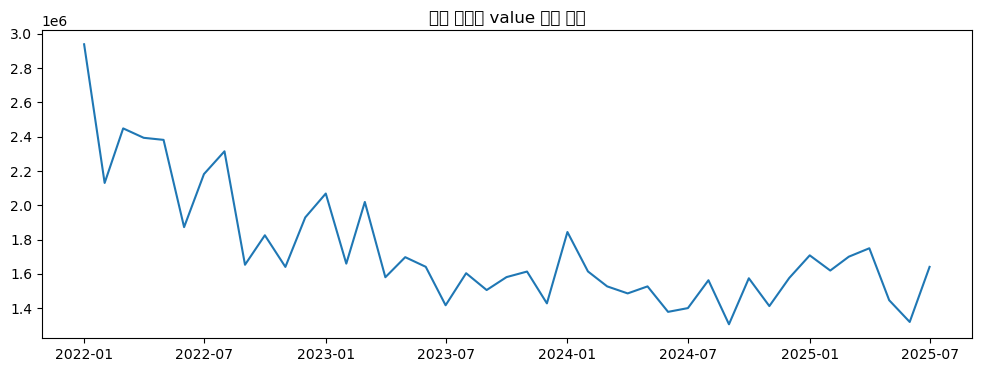

In [3]:
# year-month 조합 만들기
df['ym'] = df['year'].astype(str) + "-" + df['month'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# 아이템별 간단 추세 확인 (전체 평균)
monthly_avg = df.groupby('date')['value'].mean()

plt.figure(figsize=(12,4))
plt.plot(monthly_avg)
plt.title("전체 아이템 value 월별 평균")
plt.show()
